In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import pathlib
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matminer.featurizers.structure import XRDPowderPattern

from algorithms import pca_algo, kmeans_algo, nmf_algo, tsne_algo
from val_sort import sort_clusterlabels_defects, name_change, plot2d, plot3d, hyperparameter_testing

In [196]:
# xrd_La_del_defects5_65_m.pkl'
# xrd_La_defects5_65_m.pkl'

pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\xrd_La_defects5_65_o.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[ 1.36459548 5.41503098 -3.86106899] Hf, [ 1...",Hf14La2O32_sc122_No29_1.cif,1.600793e-09,2.282765e-06,2.690808e-04,2.621802e-03,2.111604e-03,1.405791e-04,7.736143e-07,3.519037e-10,...,0.005880,0.002382,0.017793,0.032932,0.057329,0.048775,0.016210,0.018590,0.005993,0.000237
1,"[[1.341085 0.18425587 6.37172445] Hf, [1.310...",Hf14La2O32_sc122_No29_2.cif,1.760559e-10,4.817747e-07,1.067549e-04,1.915498e-03,2.783082e-03,3.274317e-04,3.119361e-06,2.406362e-09,...,0.007831,0.004018,0.013977,0.043331,0.057707,0.037043,0.016392,0.013960,0.007034,0.001910
2,"[[1.33465783 0.16493041 6.34529803] Hf, [1.396...",Hf14La2O32_sc122_No29_3.cif,1.157423e-30,1.723137e-23,2.069997e-17,2.016950e-12,1.604702e-08,1.050629e-05,5.705083e-04,2.585244e-03,...,0.006819,0.002314,0.014910,0.044137,0.060315,0.038832,0.016192,0.015063,0.006521,0.001750
3,"[[ 1.24453579 0.01069707 -9.04812028] La, [ 1...",Hf14La2O32_sc122_No29_4.cif,9.241153e-10,1.410563e-06,1.878075e-04,2.237200e-03,2.447594e-03,2.553652e-04,3.036324e-04,1.278621e-03,...,0.006638,0.001498,0.014413,0.035664,0.059215,0.045300,0.015154,0.019826,0.005429,0.000181
4,"[[ -3.75097439 -10.43915897 -9.12936741] La, ...",Hf14La2O32_sc122_No29_5.cif,7.973916e-10,1.283680e-06,1.885475e-04,2.552912e-03,3.180473e-03,3.779347e-04,7.514423e-04,2.626384e-03,...,0.005602,0.002503,0.013829,0.035775,0.057385,0.044596,0.015022,0.018461,0.005942,0.000843
5,"[[ 1.2611523 -0.06523272 1.24610485] La, [ 3...",Hf14La2O32_sc122_No29_6.cif,5.777206e-10,1.055028e-06,1.709309e-04,2.476798e-03,3.203252e-03,3.671829e-04,1.094733e-04,6.182014e-04,...,0.006220,0.001616,0.011492,0.038309,0.067916,0.039837,0.013864,0.020053,0.004972,0.000132
6,"[[ 1.23313315 -10.42207692 1.29644454] La, ...",Hf14La2O32_sc122_No29_7.cif,4.098588e-10,6.969923e-07,9.470272e-05,1.028105e-03,8.917776e-04,6.641802e-05,2.689204e-04,1.284770e-03,...,0.005918,0.001439,0.013632,0.038452,0.068810,0.038332,0.014031,0.020394,0.004151,0.000084
7,"[[ -3.82589878 -10.3855898 -8.98870624] La, ...",Hf14La2O32_sc122_No29_8.cif,4.894768e-11,1.594460e-07,3.985858e-05,7.646401e-04,1.125694e-03,1.295802e-04,1.439254e-04,6.513421e-04,...,0.006802,0.001843,0.012792,0.042197,0.065786,0.035172,0.013501,0.020374,0.002902,0.000032
8,"[[ 1.2942159 -10.4288387 1.21365453] La, ...",Hf14La2O32_sc122_No29_9.cif,1.963053e-09,2.629538e-06,3.076446e-04,3.234607e-03,3.185745e-03,3.083884e-04,1.429916e-04,6.222537e-04,...,0.006047,0.001934,0.017397,0.028541,0.050726,0.053259,0.014495,0.021971,0.005138,0.000114
9,"[[ 6.48514391 -5.08053982 1.24811179] Hf, [ 1...",Hf14La2O32_sc212_No29_10.cif,1.358444e-10,3.896777e-07,9.187983e-05,1.780680e-03,2.836627e-03,3.714238e-04,3.997496e-06,3.536367e-09,...,0.007178,0.002125,0.011395,0.037004,0.061951,0.045597,0.014790,0.018892,0.006167,0.000323


In [197]:
labels_true = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\data\data_labels\La_defects_labels_o.pkl")
labels_true.value_counts()
labels_true

0       2La
1       2La
2       2La
3       2La
4       2La
5       2La
6       2La
7       2La
8       2La
9       2La
10      2La
11      2La
12      2La
13      2La
14      2La
15      2La
16      2La
17      2La
18      2La
19      2La
20      2La
21      2La
22      2La
23      2La
24      2La
25      2La
26      2La
27      2La
28      2La
29      2La
30      2La
31      2La
32      2La
33      2La
34      2La
35      2La
36      2La
37      2La
38      2La
39      2La
40      2La
41      2La
42      2La
43      2La
44      2La
45      2La
46      2La
47      2La
48      2La
49      2La
50      2La
51      2La
52      LaV
53      LaV
54      LaV
55      LaV
56      LaV
57      LaV
58      LaV
59      LaV
60      LaV
61      LaV
62      LaV
63      LaV
64      LaV
65      LaV
66      LaV
67      LaV
68      LaV
69      LaV
70      LaV
71      LaV
72      LaV
73      LaV
74      LaV
75      LaV
76      LaV
77      LaV
78      LaV
79      LaV
80      LaV
81      LaV
82      LaV
83  

In [198]:
X = df.iloc[:,2:]

In [199]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[6.91946502e-01, 7.81878730e-01, 8.31724238e-01, ...,
        6.16032340e-01, 1.79538905e-01, 4.96892559e-02],
       [7.61005657e-02, 1.65014531e-01, 3.29977496e-01, ...,
        2.66081126e-01, 2.39971948e-01, 4.51566372e-01],
       [5.00298864e-22, 5.90198449e-18, 6.39832465e-14, ...,
        3.49461103e-01, 2.10220412e-01, 4.12987726e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.44886836e-01, 1.85293860e-01, 1.00000000e+00],
       [7.81406334e-02, 1.35463612e-01, 1.79525500e-01, ...,
        0.00000000e+00, 1.53094294e-01, 6.99146478e-01],
       [5.61177520e-03, 2.57340342e-02, 8.75414260e-02, ...,
        1.82390973e-01, 1.18602774e-01, 3.51363516e-01]])

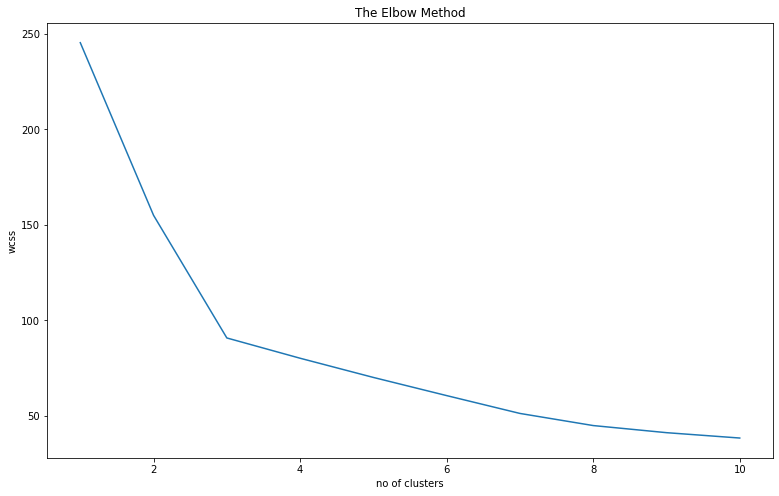

In [200]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [201]:
# PCA Testing

[42.3 69.2 76.9 82.8 87.4 90.1 92.3 94.4 95.4 96.2 97.  97.5 98.  98.4
 98.7 99.  99.2 99.3 99.4 99.5 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6
 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6
 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6]


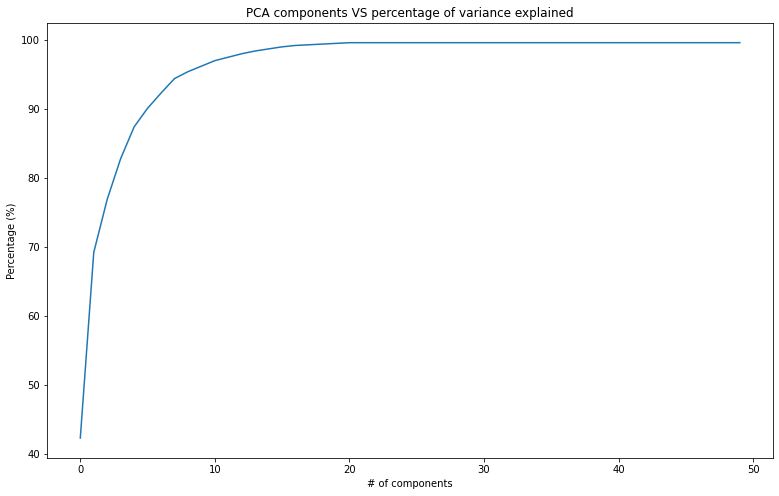

In [202]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
print(variance_ratio)
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [203]:
comp = 30 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, n_clusters = 4)

In [204]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.36713325589126494

In [205]:
dfpca_kmeans['labels'] = labels_true

In [206]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

In [207]:
#pd.set_option('display.max_rows', None)
dfpca_kmeans3

,x1,x2,x3,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,cluster,labels
0,1.316316,-0.197469,0.477930,-0.964733,0.365285,-0.309428,0.070789,-0.269341,0.028743,0.150095,...,0.004767,0.030135,0.007251,0.007972,0.002581,0.023854,-0.007428,-0.000526,1,2La
1,1.187155,-0.022599,0.023253,-0.300862,0.538082,0.418525,0.442822,0.357011,0.184092,-0.110421,...,-0.048228,-0.021793,0.015238,-0.040093,-0.025941,-0.027770,-0.032201,0.030946,1,2La
2,1.344663,-0.300046,-0.104905,1.366188,0.562177,-0.412211,0.145205,-0.330296,0.148198,-0.167336,...,0.019723,0.006993,-0.036708,-0.053418,0.003429,0.000335,-0.025766,0.004159,1,2La
3,1.340867,-0.449415,0.391776,-0.120586,0.051974,-0.280309,-0.043317,-0.122181,0.074894,-0.047435,...,-0.026614,0.075393,-0.000423,-0.001091,-0.018831,0.007145,0.018315,-0.006169,1,2La
4,1.397382,-0.620540,0.820315,0.566384,0.008315,-0.565662,-0.302072,0.568031,-0.243088,0.039601,...,-0.051715,0.040915,-0.033972,-0.003679,0.036282,0.064025,0.021873,0.017712,1,2La
5,1.352022,-0.531688,0.104299,-0.234215,-0.094742,0.138424,-0.051489,0.239859,0.202833,0.093888,...,-0.023102,-0.000165,0.009815,-0.004093,-0.046944,-0.023129,0.007556,-0.020683,1,2La
6,1.404767,-0.381975,-0.303403,0.279373,0.207423,-0.326969,-0.013360,-0.211485,0.066508,0.035510,...,-0.047057,-0.033089,0.036881,-0.025543,-0.020880,0.005951,0.012544,0.005477,1,2La
7,1.269134,-0.227257,-0.577866,0.013265,0.370122,-0.067123,-0.062166,0.000549,0.275341,-0.236437,...,0.011895,-0.085646,-0.005829,0.035279,-0.006670,-0.001181,0.022230,0.009559,1,2La
8,1.323508,-0.333130,0.942050,-0.945721,-0.076617,-0.484437,-0.130603,-0.250415,-0.052063,-0.149644,...,0.005520,-0.007874,-0.052307,0.037347,-0.013930,-0.011678,-0.013352,-0.017987,1,2La
9,1.181342,-0.184587,-0.085263,-0.449907,0.118173,0.350012,0.290377,0.290052,-0.372235,0.031632,...,0.006195,0.059817,0.024319,0.050806,-0.019015,0.004646,-0.003664,0.024621,1,2La


In [208]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [181]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [182]:
dfpca_kmeans = sort_clusterlabels_defects(dfpca_kmeans, n_clusters = 4)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.696969696969697


In [183]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[30, 19,  3,  0],
       [ 0, 12,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  8,  0, 24]], dtype=int64)

In [184]:
comp = list(range(1, 50 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49
Best value of performance: 0.696969696969697 Hyperparameter = 2
Overview: {1: 0.494949494949495, 2: 0.696969696969697, 3: 0.696969696969697, 4: 0.696969696969697, 5: 0.696969696969697, 6: 0.696969696969697, 7: 0.696969696969697, 8: 0.696969696969697, 9: 0.696969696969697, 10: 0.696969696969697, 11: 0.696969696969697, 12: 0.696969696969697, 13: 0.696969696969697, 14: 0.696969696969697, 15: 0.696969696969697, 16: 0.696969696969697, 17: 0.696969696969697, 18: 0.696969696969697, 19: 0.696969696969697, 20: 0.6969696969

In [185]:
# NMF Testing 

In [186]:
component = 14
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, n_clusters = 4) # calculate clusterlabels and asign labels to W_df_kmeans 

In [187]:
W_df_kmeans['labels'] = labels_true

In [188]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.45871033026802116

In [189]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

In [190]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [191]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [192]:
W_df_kmeans = sort_clusterlabels_defects(W_df_kmeans, n_clusters = 4)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.5959595959595959


In [193]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[16,  1, 15,  0],
       [ 0, 28, 21,  3],
       [ 0,  0, 15,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [194]:
# Hyperparameter components testing

In [195]:
components = list(range(2, 50 , 2))
hyperparameter_testing(X,'nmf', components, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Best value of performance: 0.7373737373737373 Hyperparameter = 6
Overview: {2: 0.6060606060606061, 4: 0.696969696969697, 6: 0.7373737373737373, 8: 0.6464646464646465, 10: 0.6767676767676768, 12: 0.6565656565656566, 14: 0.6060606060606061, 16: 0.6060606060606061, 18: 0.6868686868686869, 20: 0.7171717171717171, 22: 0.7272727272727273, 24: 0.6363636363636364, 26: 0.5454545454545454, 28: 0.5959595959595959, 30: 0.7171717171717171, 32: 0.6666666666666666, 34: 0.6161616161616161, 36: 0.5353535353535354, 38: 0.6161616161616161, 40: 0.6464646464646465, 42: 0.5959595959595959, 44: 0.6464646464646465, 46: 0.6262626262626263, 48: 0.7272727272727273}


## PRDF Tests


In [209]:
pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\df_prdf_La_Hf_O_La_o.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

,structure,name,La-La PRDF r=0.00-0.50,La-La PRDF r=0.50-1.00,La-La PRDF r=1.00-1.50,La-La PRDF r=1.50-2.00,La-La PRDF r=2.00-2.50,La-La PRDF r=2.50-3.00,La-La PRDF r=3.00-3.50,La-La PRDF r=3.50-4.00,...,O-O PRDF r=10.00-10.50,O-O PRDF r=10.50-11.00,O-O PRDF r=11.00-11.50,O-O PRDF r=11.50-12.00,O-O PRDF r=12.00-12.50,O-O PRDF r=12.50-13.00,O-O PRDF r=13.00-13.50,O-O PRDF r=13.50-14.00,O-O PRDF r=14.00-14.50,O-O PRDF r=14.50-15.00
0,"[[ 1.36459548 5.41503098 -3.86106899] Hf, [ 1...",Hf14La2O32_sc122_No29_1.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.063044,0.055251,0.068052,0.056189,0.051829,0.066933,0.056086,0.064181,0.055348,0.058609
1,"[[1.341085 0.18425587 6.37172445] Hf, [1.310...",Hf14La2O32_sc122_No29_2.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.065694,0.051120,0.068524,0.056477,0.051432,0.066688,0.054499,0.063971,0.056622,0.057603
2,"[[1.33465783 0.16493041 6.34529803] Hf, [1.396...",Hf14La2O32_sc122_No29_3.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.063801,0.051292,0.071353,0.056333,0.049841,0.068034,0.055632,0.062603,0.055250,0.058334
3,"[[ 1.24453579 0.01069707 -9.04812028] La, [ 1...",Hf14La2O32_sc122_No29_4.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011301,...,0.065978,0.050862,0.070017,0.055757,0.052757,0.066015,0.056029,0.064234,0.055544,0.057237
4,"[[ -3.75097439 -10.43915897 -9.12936741] La, ...",Hf14La2O32_sc122_No29_5.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011301,...,0.066546,0.048969,0.071981,0.055613,0.052293,0.065281,0.057332,0.061919,0.057797,0.056186
5,"[[ 1.2611523 -0.06523272 1.24610485] La, [ 3...",Hf14La2O32_sc122_No29_6.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022602,...,0.065410,0.052325,0.071510,0.054965,0.050702,0.068096,0.055349,0.063392,0.057797,0.054997
6,"[[ 1.23313315 -10.42207692 1.29644454] La, ...",Hf14La2O32_sc122_No29_7.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.064747,0.051292,0.070802,0.056910,0.049112,0.067790,0.055179,0.064076,0.056426,0.056552
7,"[[ -3.82589878 -10.3855898 -8.98870624] La, ...",Hf14La2O32_sc122_No29_8.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.063611,0.052583,0.071510,0.055325,0.051299,0.066321,0.056086,0.063392,0.056377,0.056460
8,"[[ 1.2942159 -10.4288387 1.21365453] La, ...",Hf14La2O32_sc122_No29_9.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022602,...,0.064463,0.052239,0.070174,0.055757,0.053950,0.064792,0.057389,0.061603,0.056818,0.058472
9,"[[ 6.48514391 -5.08053982 1.24811179] Hf, [ 1...",Hf14La2O32_sc212_No29_10.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.065505,0.051464,0.072610,0.053596,0.050371,0.069625,0.053026,0.064918,0.058483,0.056689


In [210]:
X = df.iloc[:, 2:]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [211]:
comp = 40 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, n_clusters = 4)

In [212]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.3157926111066979

In [213]:
dfpca_kmeans['labels'] = labels_true

In [214]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

In [215]:
dfpca_kmeans3

,x1,x2,x3,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,cluster,labels
0,1.388709,-0.766605,-0.242716,-0.855742,-1.330210,-0.469790,-1.105510,0.598387,0.103312,0.643614,...,0.111743,-0.060578,-0.085000,0.075989,0.150950,0.219865,0.194577,0.042622,1,2La
1,1.732079,-0.908476,-0.358621,-0.700694,-1.278531,-0.527611,-0.213495,0.135431,-0.008817,-0.364792,...,-0.311787,0.009890,-0.080455,0.104681,-0.253782,-0.154141,0.022874,0.108059,1,2La
2,1.603639,-0.958573,-0.508439,0.025072,-1.583771,-0.851078,-0.038217,0.101608,0.651219,-0.508599,...,0.135132,0.221246,-0.165188,0.063949,0.120841,-0.031564,-0.037609,-0.190769,1,2La
3,1.265175,-0.880753,0.147947,-0.101121,0.529934,0.033981,-0.508036,-0.218220,0.091668,-0.462310,...,0.002292,0.153866,-0.005042,0.417181,-0.009954,0.075473,-0.025956,0.155625,3,2La
4,1.317091,-0.596307,0.374813,-0.212392,0.950845,-0.023382,-0.372158,-0.013417,0.462073,-0.710508,...,0.343437,-0.079930,-0.336039,-0.024394,0.085598,-0.151522,-0.154474,-0.002873,3,2La
5,1.486008,-1.332387,1.498704,-0.064875,0.158831,-0.091063,0.205215,-0.593540,0.121376,0.115273,...,0.121580,0.205813,0.140626,-0.049366,-0.038286,-0.044463,-0.090609,0.073082,3,2La
6,1.466843,-1.174974,-1.228560,0.110141,0.433445,0.167936,-0.365023,-0.073532,0.121267,0.097809,...,0.149819,-0.000538,-0.042210,-0.191287,-0.090732,-0.093455,0.170856,0.118358,1,2La
7,1.772601,-1.110631,-1.299676,0.310057,0.751344,0.257302,-0.499814,-0.307526,0.050727,-0.115574,...,0.159010,0.072647,0.087019,-0.053926,-0.145604,0.044143,0.189908,-0.186621,1,2La
8,1.086357,-0.754130,1.850767,-0.290920,0.192143,0.140583,-0.869179,0.560264,-0.111616,0.162788,...,-0.087777,-0.038074,-0.165049,-0.000781,0.045475,0.080943,-0.023780,-0.247421,3,2La
9,1.248911,-0.915884,-0.402892,-0.844466,-1.529599,-0.037157,0.203343,0.410901,-0.873442,0.281395,...,0.153797,0.134767,0.113527,-0.033633,0.200278,-0.206514,-0.117955,-0.191583,1,2La


In [216]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [217]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [218]:
dfpca_kmeans = sort_clusterlabels_defects(dfpca_kmeans, n_clusters = 4)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.6666666666666666


In [219]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[63, 17,  3, 13],
       [ 0,  0,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [220]:
comp = list(range(1, 50 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49
Best value of performance: 0.696969696969697 Hyperparameter = 23
Overview: {1: 0.6363636363636364, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.6666666666666666, 7: 0.6666666666666666, 8: 0.6666666666666666, 9: 0.6666666666666666, 10: 0.6666666666666666, 11: 0.6666666666666666, 12: 0.6666666666666666, 13: 0.6666666666666666, 14: 0.6868686868686869, 15: 0.6666666666666666, 16: 0.6666666666666666, 17: 0.6666666666666666, 18: 0.6666666666666666, 19: 0.68686868686868

In [221]:
# NMF Testing 

In [222]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, n_clusters = 4) # calculate clusterlabels and asign labels to W_df_kmeans 

In [223]:
W_df_kmeans['labels'] = labels_true

In [224]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.5581175886892594

In [225]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

In [226]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [227]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [228]:
W_df_kmeans = sort_clusterlabels_defects(W_df_kmeans, n_clusters = 4)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.7171717171717171


In [229]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[44,  0,  0,  0],
       [16, 27,  9,  3],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [230]:
# Hyperparameter components testing

In [231]:
components = list(range(1, 50 , 2))
hyperparameter_testing(X,'nmf', components, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Best value of performance: 0.7777777777777778 Hyperparameter = 31
Overview: {1: 0.5959595959595959, 3: 0.6565656565656566, 5: 0.6767676767676768, 7: 0.6666666666666666, 9: 0.7171717171717171, 11: 0.6868686868686869, 13: 0.7373737373737373, 15: 0.5858585858585859, 17: 0.6767676767676768, 19: 0.5757575757575758, 21: 0.7272727272727273, 23: 0.6060606060606061, 25: 0.6262626262626263, 27: 0.6262626262626263, 29: 0.6666666666666666, 31: 0.7777777777777778, 33: 0.5252525252525253, 35: 0.696969696969697, 37: 0.6161616161616161, 39: 0.5353535353535354, 41: 0.5656565656565656, 43: 0.5151515151515151, 45: 0.5050505050505051, 47: 0.6060606060606061, 49: 0.5656565656565656}
